In [1]:
import os
import numpy as np
from PIL import Image
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

benign_path = "/mnt/myFiles/archive (7)/Dataset of Mammography with Benign Malignant Breast Masses/Dataset of Mammography with Benign Malignant Breast Masses/DDSM Dataset/Benign Masses"
malignant_path = "/mnt/myFiles/archive (7)/Dataset of Mammography with Benign Malignant Breast Masses/Dataset of Mammography with Benign Malignant Breast Masses/DDSM Dataset/Malignant Masses"

# Image size()
image_size = (32, 32) 




In [2]:
def load_images_from_folder(folder, label, image_size):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
           #grayscale convrsion
            img = Image.open(img_path).convert('L')
            img = img.resize(image_size)
            img_array = np.array(img).flatten()  # Flatten the image to a 1D array
            images.append(img_array)
            labels.append(label) 
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

In [3]:
benign_images, benign_labels = load_images_from_folder(benign_path, label=-1, image_size=image_size)
malignant_images, malignant_labels = load_images_from_folder(malignant_path, label=1, image_size=image_size)

# Combine the data
X = np.array(benign_images + malignant_images)  # All the images in a single array
y = np.array(benign_labels + malignant_labels)  # Corresponding labels

In [4]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) with a linear kernel
clf = svm.SVC(kernel='linear')  
clf.fit(X_train, y_train)

SVC(kernel='linear')

Test Accuracy: 98.44%

Confusion Matrix:
[[1168   23]
 [  18 1417]]


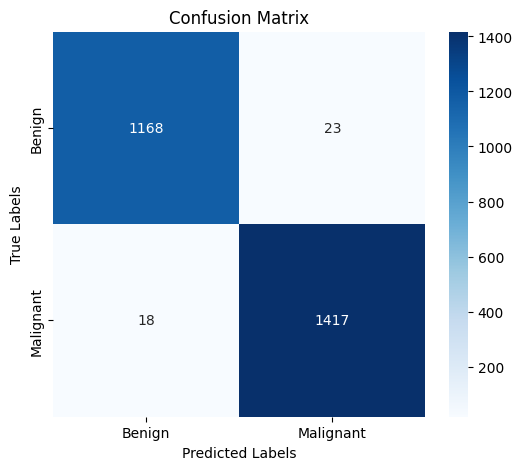

In [5]:

predictions = clf.predict(X_test)

# Evaluate:
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      1191
   Malignant       0.98      0.99      0.99      1435

    accuracy                           0.98      2626
   macro avg       0.98      0.98      0.98      2626
weighted avg       0.98      0.98      0.98      2626



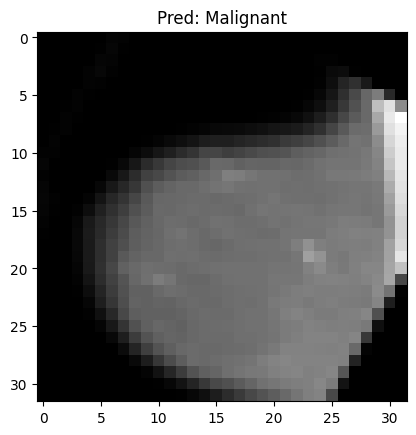

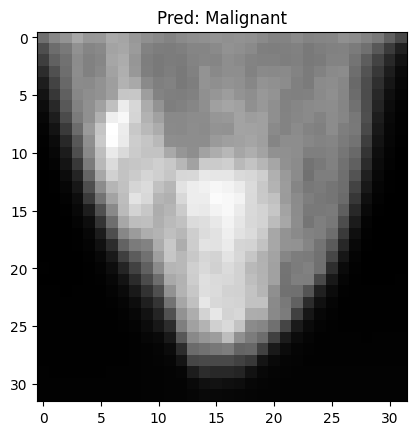

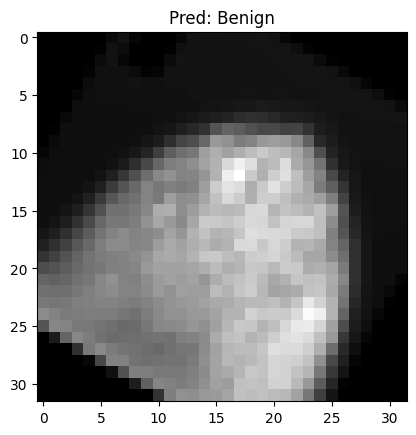

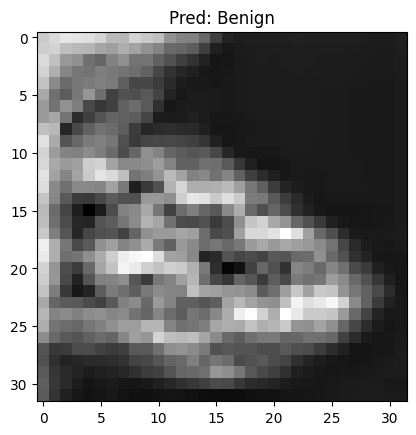

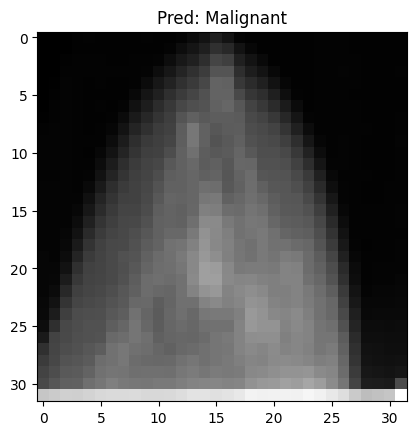

In [6]:
report = classification_report(y_test, predictions, target_names=['Benign', 'Malignant'])
print("\nClassification Report:")
print(report)

#Visualize some of the test images 
for i in range(5):  
    plt.imshow(X_test[i].reshape(image_size), cmap='gray')  # Reshape 
    plt.title(f"Pred: {'Malignant' if predictions[i] == 1 else 'Benign'}")
    plt.show()



In [7]:

import joblib
joblib.dump(clf, 'svm_model.pkl')
print("Model saved as 'svm_model.pkl'")

Model saved as 'svm_model.pkl'
